In [27]:
import json
import torch
import pandas as pd

with open('results\\val.json') as f:
    file = json.load(f)

In [28]:
ex = pd.read_excel('hongkong\\train_data.xlsx')
names = ex['youtube_id'].unique()
print(len(names))

label = []
for name in names:
    label.append(ex[ex['youtube_id'] == name]['label'].unique()[0])

print(len(label))
ex

30
30


,label,youtube_id,time_start,time_end,split
0,Traveling,IMG_0113,321,329,train
1,Traveling,IMG_0113,329,338,train
2,Traveling,IMG_0113,338,347,train
3,Traveling,IMG_0113,347,355,train
4,Traveling,IMG_0113,355,363,train
...,...,...,...,...,...
134,Measuring Rebar,IMG_7230,15,54,train
135,Measuring Rebar,IMG_7230,54,93,train
136,Measuring Rebar,IMG_7230,93,132,train
137,Measuring Rebar,IMG_7230,132,166,train


In [29]:
preds = []

for result in file['results']:
    for ans in file['results'][result]:
        preds.append(ans['label'])
        break


In [30]:
names = {
    'Traveling': 0,
    'Lifting Brick': 1, 
    'Lifting Rebar': 2, 
    'Measuring Rebar': 3, 
    'Tying Rebar': 4, 
    'Hammering': 5, 
    'Drilling': 6, 
    'Idle': 7
}

for i, l in enumerate(label):
    label[i] = names[l]

print(label)
new_label = label

for i, l in enumerate(preds):
    preds[i] = names[l]

print(preds)
new_preds = preds


[0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3]
[0, 1, 2, 0, 2, 7, 7, 7, 0, 1, 2, 3, 3, 3, 4, 7, 6, 7, 0, 1, 7, 3, 3, 7, 6, 7, 0, 0, 0, 3]


In [31]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import numpy as np

preds = np.array(preds)
preds = np.reshape(preds, (-1, 1))
label = np.array(label)
label = np.reshape(label, (-1, 1))

clf = SVC(random_state=0)
clf.fit(preds, label)

c:\Users\syu\miniconda3\envs\torch\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

c:\Users\syu\miniconda3\envs\torch\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (8).

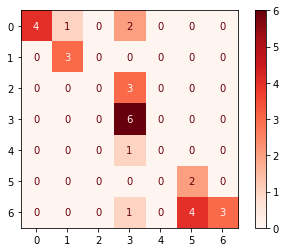

In [32]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

plot = plot_confusion_matrix(
                    clf,
                    label,
                    preds,
                    display_labels = names.keys(),
                    cmap=plt.cm.Reds,
                    normalize=None,
                )
plot.ax_.set_title('Consfusion matrix')